In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, radians, pi

In [2]:
# Константы
H = 6.626_070_15e34
C = 299_792_458

In [3]:
class LightSource:
    def __init__(self, r : int, dw : float, theta : float, intensity : float) -> None:
        self.r = r
        self.dw = dw
        self.theta = theta
        self.intenisty = intensity

    def projection_area(self) -> float:
        return self.dw * self.r * self.r * cos(self.theta)
    
    def flux(self, wave_len : int) -> float:
        wave_len /= 10 ** 9
        return (H * C) / wave_len  

    def radiant_intensity(self, wave_len : int) -> float:
        return self.flux(wave_len) / self.dw
    
    def irradiance(self, wave_len : int) -> float:
        return (self.flux(wave_len)) / (4 * pi * self.r ** 2)
    
    def surface_radiance(self, wave_len : int) -> float:
        return self.flux(wave_len) / (self.projection_area() * cos(self.theta) * self.dw)
        



In [4]:
# c = LightSource(2, radians(45), radians(45))
c = LightSource(2, 45, 50, 250)

print(c.projection_area())

173.6938851285804


In [5]:
wave_lens = list(range(370, 731))
f, l, e = [], [], []

for wave_len in wave_lens:
    f.append(c.flux(wave_len))
    l.append(c.surface_radiance(wave_len))
    e.append(c.irradiance(wave_len))



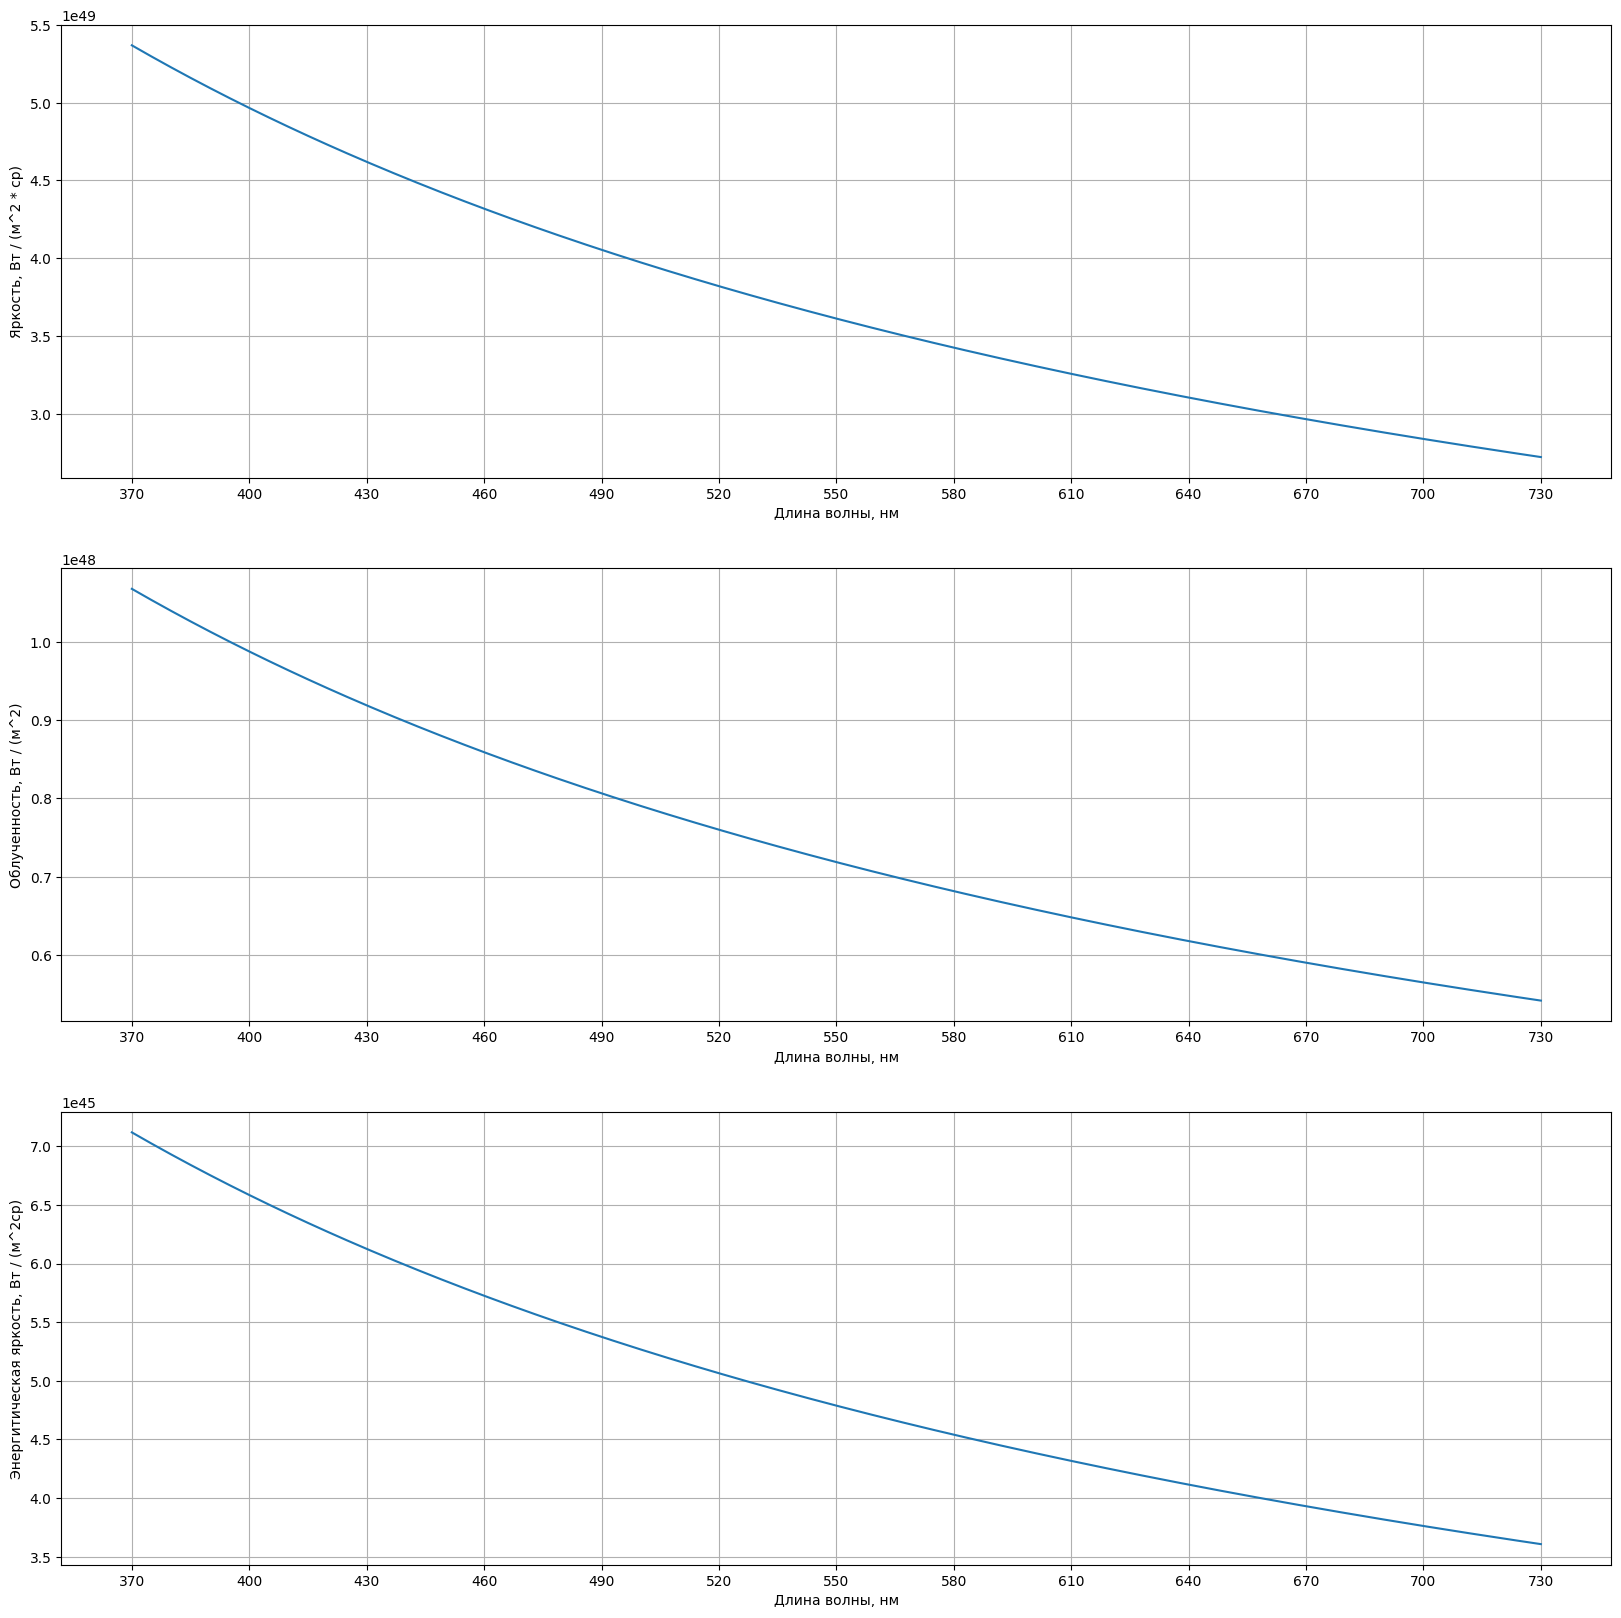

In [6]:
# отрисовка графиков

plt.figure(figsize=(20, 20))

plt.subplot(3,1,1)
plt.plot(wave_lens, f)
plt.xlabel("Длина волны, нм")
plt.ylabel("Яркость, Вт / (м^2 * ср)")
plt.xticks(list(range(370, 731, 30)))
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(wave_lens, e)
plt.xlabel("Длина волны, нм")
plt.ylabel("Облученность, Вт / (м^2)")
plt.xticks(list(range(370, 731, 30)))
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(wave_lens, l)
plt.xlabel("Длина волны, нм")
plt.ylabel("Энергитическая яркость, Вт / (м^2ср)")
plt.xticks(list(range(370, 731, 30)))
plt.grid(True)



